<a href="https://colab.research.google.com/github/sonupp13/TIME-SERIES-ANALYSIS/blob/main/DS_ARIMA_%26_SARIMA_TIME_SERIES_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions


In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/perrin-freres-monthly-champagne-.csv')
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [24]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [25]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [26]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [27]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
df['Month']=pd.to_datetime(df['Month'])

In [30]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [31]:
df.set_index('Month').head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [32]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: >

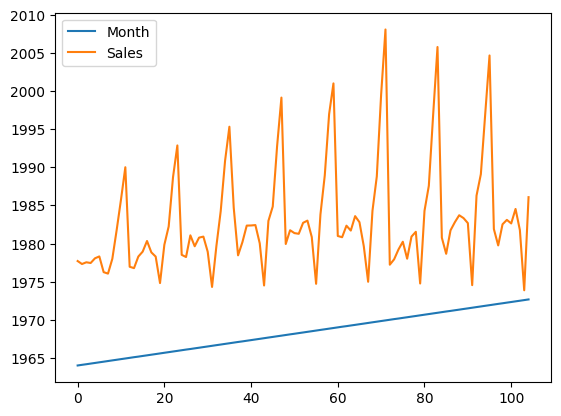

In [33]:
df.plot()

In [34]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [35]:
test_result=adfuller(df['Sales'])

In [36]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [37]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# **since the data is non stationary we use diffrencing to make it stationary**

In [20]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [21]:
df['Sales'].shift(1)

0         NaN
1      2815.0
2      2672.0
3      2755.0
4      2721.0
        ...  
100    4788.0
101    4618.0
102    5312.0
103    4298.0
104    1413.0
Name: Sales, Length: 105, dtype: float64

It calculates the seasonal first difference by subtracting the 'Sales' values from 12 periods ago from the current 'Sales' values. This helps remove seasonality from the data.


In [ ]:
df['Sales'].shift(12)

Month
1964-01-01       NaN
1964-02-01       NaN
1964-03-01       NaN
1964-04-01       NaN
1964-05-01       NaN
               ...  
1972-05-01    5010.0
1972-06-01    4874.0
1972-07-01    4633.0
1972-08-01    1659.0
1972-09-01    5951.0
Name: Sales, Length: 105, dtype: float64

In [39]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [40]:
df.head(14)

,Month,Sales,Seasonal First Difference
0,1964-01-01,2815.0,NaN
1,1964-02-01,2672.0,NaN
2,1964-03-01,2755.0,NaN
3,1964-04-01,2721.0,NaN
4,1964-05-01,2946.0,NaN
5,1964-06-01,3036.0,NaN
6,1964-07-01,2282.0,NaN
7,1964-08-01,2212.0,NaN
8,1964-09-01,2922.0,NaN
9,1964-10-01,4301.0,NaN


In [41]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: >

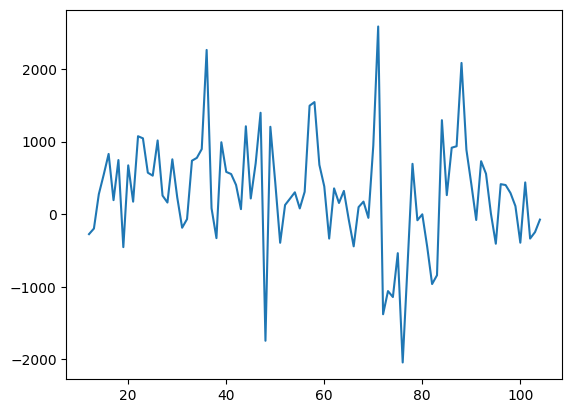

In [42]:
df['Seasonal First Difference'].plot()